### tf.data.Dataset *important* method. 

1. map()
2. batch()
3. cache()
4. prefetch()


In [104]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

In this jupyter notebook we will be using mnist dataset.

In [105]:
(ds_train_x,ds_train_y),(ds_test_x,ds_test_y)=tf.keras.datasets.mnist.load_data()
ds_train_x=tf.data.Dataset.from_tensor_slices(ds_train_x)
ds_train_y=tf.data.Dataset.from_tensor_slices(ds_train_y)
ds_test_x=tf.data.Dataset.from_tensor_slices(ds_test_x)
ds_test_y=tf.data.Dataset.from_tensor_slices(ds_test_y)



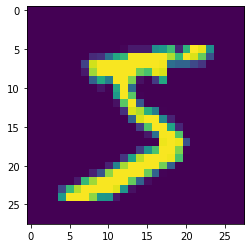

In [106]:
##Previwing dataset

for img in ds_train_x:
    plt.imshow(img)
   
    break


### Preparing the training Pipeline: Preprocessing, batch_size, shuffle


In [107]:
## Now Prepararing the dataset for simple training 
## 1st Applying map function() which works similar to python map() function
ds_train_x=ds_train_x.map(lambda x:(tf.cast(x,dtype=tf.float32))/255.0) ## before conversion to 0 to 1 scale must to float value
ds_test_x=ds_test_x.map(lambda x:(tf.cast(x,dtype=tf.float32))/255.0) ## before conversion to 0 to 1 scale must to float value
ds_train_y = ds_train_y.map(lambda x: tf.one_hot(x, depth=10))
ds_test_y = ds_test_y.map(lambda x: tf.one_hot(x, depth=10))

for i in ds_test_x:
    print('Max Value {} and Min Value {}'.format(i.numpy().max(),i.numpy().min()))
    break

for i in ds_train_y:
    print(i)
    break


Max Value 1.0 and Min Value 0.0
tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


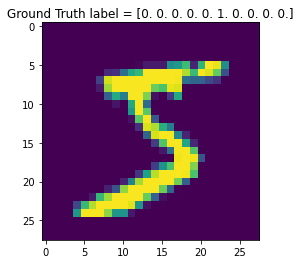

In [108]:
# Second we use zip() function to zip() two dataset. Again zip() work similar to normal zip() function in python.
ds_train=tf.data.Dataset.zip((ds_train_x,ds_train_y)) 
ds_test=tf.data.Dataset.zip((ds_test_x,ds_test_y))

for img,label in ds_train:
    plt.imshow(img)
    plt.title(f'Ground Truth label = {label}')
   
    break

In [109]:
# Now we will choose batch size of 64 
batch_size=64
ds_train=ds_train.batch(batch_size=batch_size)
ds_test=ds_test.batch(batch_size=batch_size)

for img,label in ds_train:
    print(label)
    print(f'img.shape==> {tf.shape(img).numpy()}\nlabel.shape==>{tf.shape(label).numpy()}')
    break



tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

In [110]:
## Finally for better result we will shuffle the data

ds_train=ds_train.shuffle(buffer_size=batch_size,reshuffle_each_iteration=True)

"""
What is buffer size in shuffle? 
The buffer_size argument in the shuffle() function specifies the number of elements to randomly pick from the dataset at a time.

For example, if we have a dataset of 10 elements and set buffer_size to 5, the shuffle() function will randomly pick 5 elements from 
the dataset and put them in a buffer. It will then randomly pick one of those 5 elements as the next element to return, remove it from 
the buffer, and replace it with the next element from the dataset until all elements have been returned.

The larger the buffer_size, the more elements are available for random selection, which can increase the randomness of the shuffle. 
However, a larger buffer_size can also require more memory and computational resources.

In general, it is recommended to set the buffer_size to be at least the size of the dataset to ensure that all elements are included 
in the shuffling process. However, the optimal buffer_size may depend on the size of your dataset and your available computational resources.

"""

for img,label in ds_train:
    print(label)
    print(f'img.shape==> {tf.shape(img).numpy()}\nlabel.shape==>{tf.shape(label).numpy()}')
    break

tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

In [114]:
## Defining a simple training mode

def model():
    model=tf.keras.models.Sequential(
        [
        tf.keras.Input(shape=(28,28,1)),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10,activation='softmax')])
    

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model    

In [115]:
model=model()

In [116]:
#training the model

model.fit(ds_train,epochs=15,shuffle=True,verbose=True)

Epoch 1/15
938/938 [==============================] - 20s 7ms/step - loss: 0.2719 - accuracy: 0.9204
Epoch 2/15
938/938 [==============================] - 6s 7ms/step - loss: 0.0865 - accuracy: 0.9735
Epoch 3/15
938/938 [==============================] - 6s 6ms/step - loss: 0.0654 - accuracy: 0.9796
Epoch 4/15
938/938 [==============================] - 6s 6ms/step - loss: 0.0548 - accuracy: 0.9829
Epoch 5/15
938/938 [==============================] - 6s 6ms/step - loss: 0.0463 - accuracy: 0.9855
Epoch 6/15
938/938 [==============================] - 6s 6ms/step - loss: 0.0407 - accuracy: 0.9875
Epoch 7/15
938/938 [==============================] - 6s 6ms/step - loss: 0.0364 - accuracy: 0.9887
Epoch 8/15
938/938 [==============================] - 6s 7ms/step - loss: 0.0327 - accuracy: 0.9897
Epoch 9/15
938/938 [==============================] - 6s 6ms/step - loss: 0.0295 - accuracy: 0.9907
Epoch 10/15
938/938 [==============================] - 6s 6ms/step - loss: 0.0267 - accuracy: 0.991

In [126]:
## How do we use model.predict with tf_dataset
## Prediction using whole dataset 
predicted=np.argmax(model.predict(ds_test),axis=1)

157/157 [==============================] - 1s 7ms/step


In [127]:
# On real time we only have features so using only features for prediction
predicted_from_features=np.argmax(model.predict(ds_test_x),axis=1)

ValueError: in user code:

    File "c:\Users\Akash Ghimire\anaconda3\envs\vision\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\Akash Ghimire\anaconda3\envs\vision\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Akash Ghimire\anaconda3\envs\vision\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\Akash Ghimire\anaconda3\envs\vision\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\Akash Ghimire\anaconda3\envs\vision\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Akash Ghimire\anaconda3\envs\vision\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" "                 f"(type Sequential).
    
    Input 0 of layer "conv2d_4" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (28, 28)
    
    Call arguments received by layer "sequential_2" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(28, 28), dtype=float32)
      • training=False
      • mask=None


In [130]:
for i in ds_train_x:
    print(tf.shape(i))
    break

tf.Tensor([28 28], shape=(2,), dtype=int32)
